<a href="https://colab.research.google.com/github/Giddey94/Thesis/blob/main/recommender_system_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install surprise
!pip install implicit
import os, random, pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, scipy.sparse as sparse, implicit,tensorflow as tf, time
%matplotlib inline
from google.colab import drive
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from collections import Counter
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import cross_validate

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


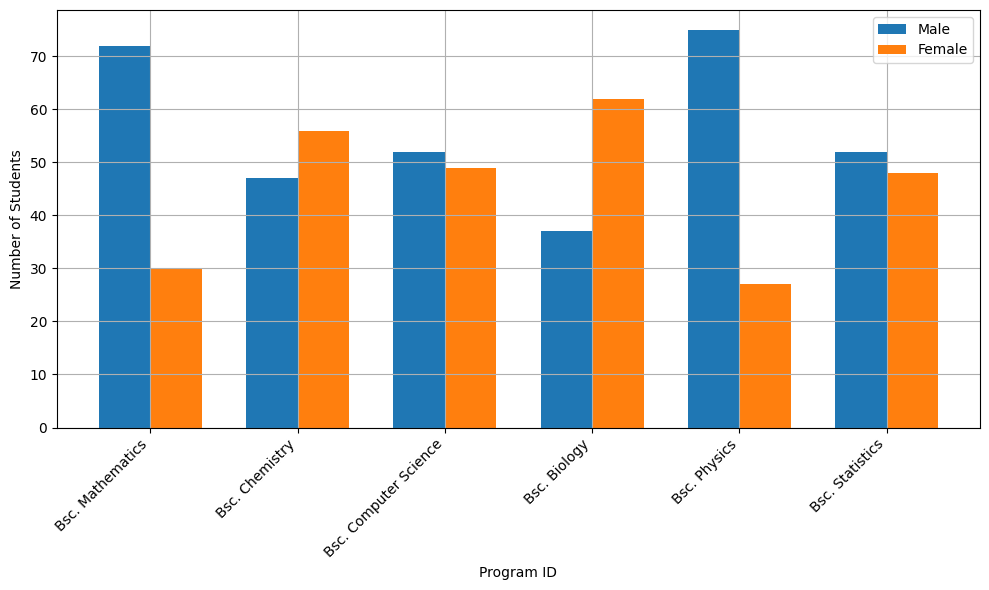

Bsc. Biology             62
Bsc. Chemistry           56
Bsc. Computer Science    49
Bsc. Statistics          48
Bsc. Mathematics         30
Bsc. Physics             27
Name: Degree_ID, dtype: int64
Bsc. Physics             75
Bsc. Mathematics         72
Bsc. Computer Science    52
Bsc. Statistics          52
Bsc. Chemistry           47
Bsc. Biology             37
Name: Degree_ID, dtype: int64
                            Age    Gender       CWA  Financially Dependent  \
Age                    1.000000  0.079543  0.011305               0.013713   
Gender                 0.079543  1.000000 -0.077307               0.006458   
CWA                    0.011305 -0.077307  1.000000               0.017822   
Financially Dependent  0.013713  0.006458  0.017822               1.000000   
Annual_Income          0.038070 -0.027873  0.167731              -0.142142   
S/F_Aid               -0.091315 -0.039442  0.050960              -0.092336   
High_School_Course    -0.003025 -0.003633  0.000834       

<ipython-input-6-5b4e47032def>:109: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = self.df.drop(['User_Num', 'Degree_Num'], axis=1).corr()


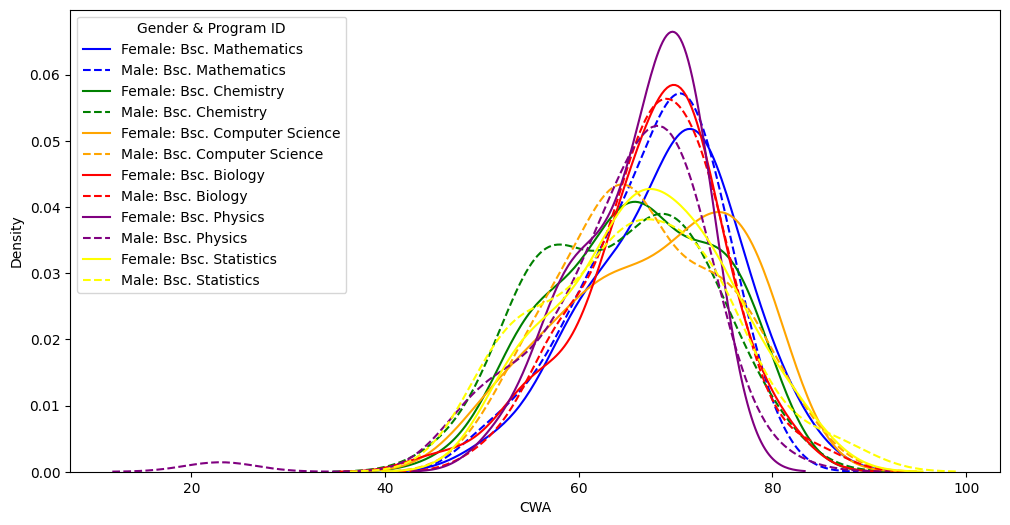

                       Coefficient
Age                      -0.003118
Gender                    0.076637
CWA                       0.081202
Financially Dependent    -0.059455
Annual_Income            -0.024207
S/F_Aid                   0.108188
High_School_Course       -0.014081 

Intercept = -2.8388108648721166
Epoch 1/300
6/6 [==============================] - 2s 117ms/step - loss: 5.2103 - mae: 2.0772 - val_loss: 2.7805 - val_mae: 1.4718 - lr: 0.0010
Epoch 2/300
6/6 [==============================] - 0s 15ms/step - loss: 2.2182 - mae: 1.2551 - val_loss: 1.2942 - val_mae: 0.9225 - lr: 0.0010
Epoch 3/300
6/6 [==============================] - 0s 19ms/step - loss: 1.3851 - mae: 0.9112 - val_loss: 1.1937 - val_mae: 0.7569 - lr: 0.0010
Epoch 4/300
6/6 [==============================] - 0s 16ms/step - loss: 1.0924 - mae: 0.7994 - val_loss: 0.8733 - val_mae: 0.6685 - lr: 0.0010
Epoch 5/300
6/6 [==============================] - 0s 20ms/step - loss: 0.7994 - mae: 0.7091 - val_loss: 0.6629 -

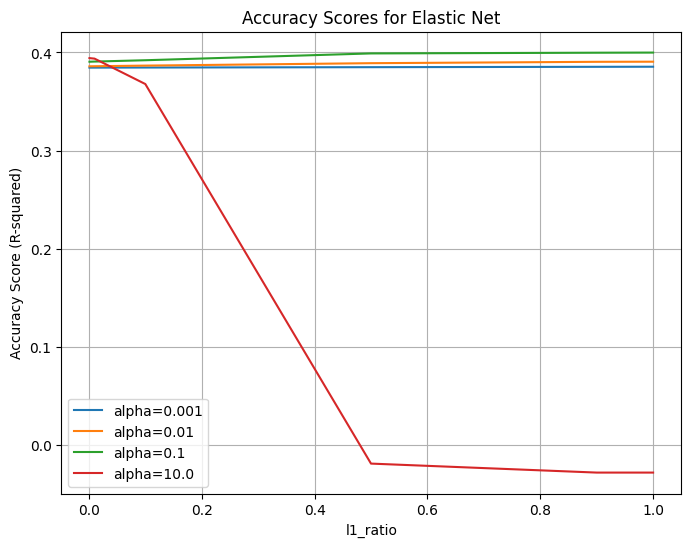

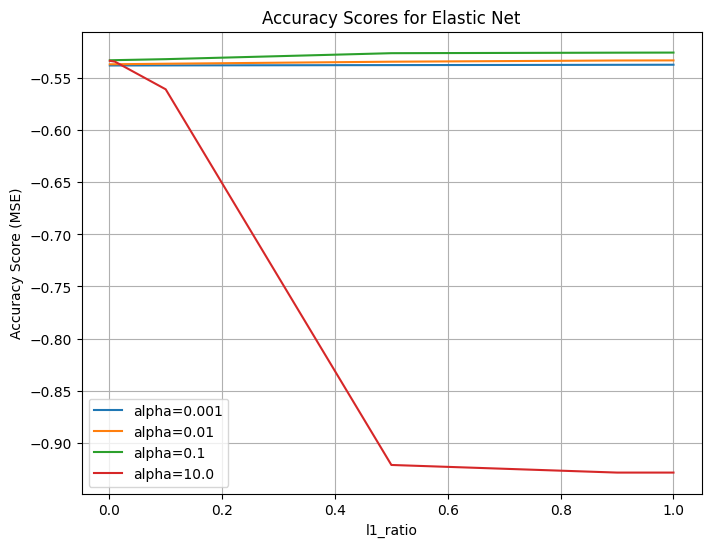

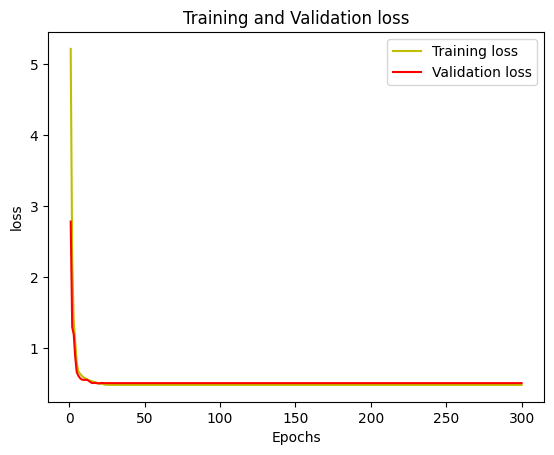

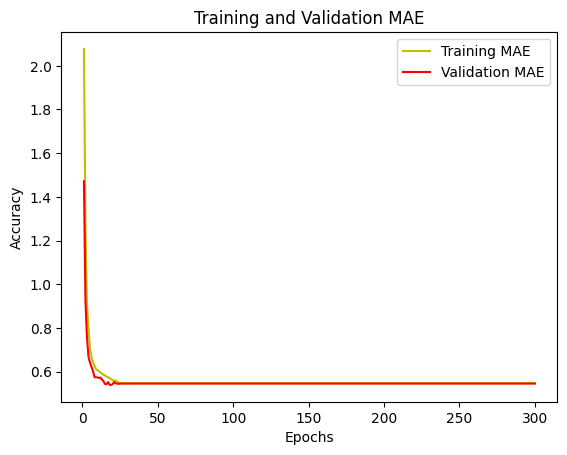

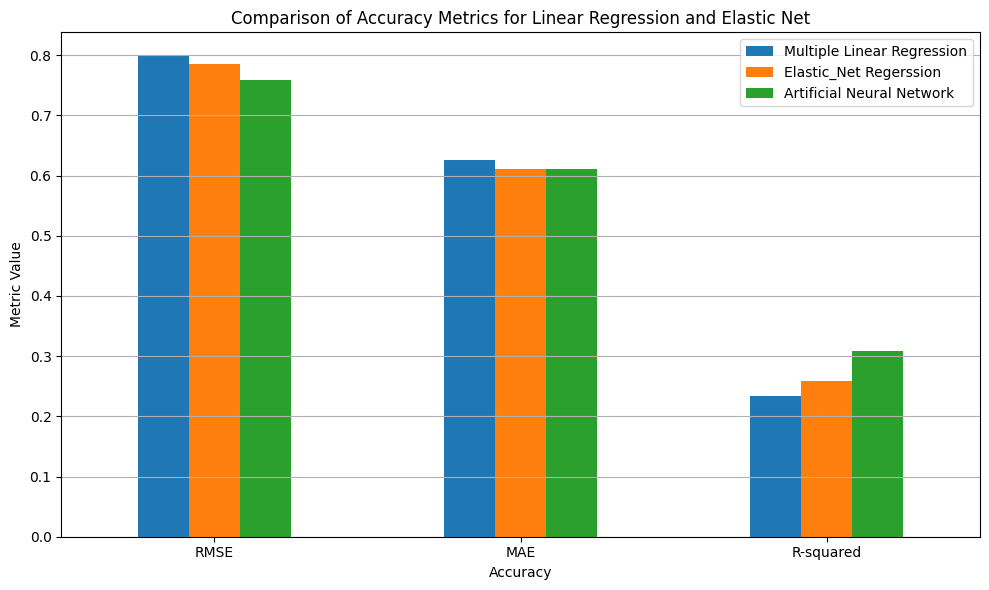

14/14 [==============================] - 0s 2ms/step
Recommended degrees (SVD) for all users:
STUDENT1:
			Bsc. Computer Science
			Bsc. Mathematics
			Bsc. Biology
			Bsc. Chemistry
			Bsc. Statistics
			Bsc. Physics
STUDENT10:
			Bsc. Computer Science
			Bsc. Mathematics
			Bsc. Biology
			Bsc. Chemistry
			Bsc. Statistics
			Bsc. Physics
STUDENT100:
			Bsc. Computer Science
			Bsc. Mathematics
			Bsc. Biology
			Bsc. Chemistry
			Bsc. Statistics
			Bsc. Physics
STUDENT101:
			Bsc. Computer Science
			Bsc. Mathematics
			Bsc. Biology
			Bsc. Statistics
			Bsc. Chemistry
			Bsc. Physics
STUDENT102:
			Bsc. Computer Science
			Bsc. Mathematics
			Bsc. Biology
			Bsc. Statistics
			Bsc. Chemistry
			Bsc. Physics
STUDENT103:
			Bsc. Computer Science
			Bsc. Mathematics
			Bsc. Biology
			Bsc. Chemistry
			Bsc. Statistics
			Bsc. Physics
STUDENT104:
			Bsc. Statistics
			Bsc. Mathematics
			Bsc. Computer Science
			Bsc. Biology
			Bsc. Chemistry
			Bsc. Physics
STUDENT105:
			Bsc. Compute

  0%|          | 0/1000 [00:00<?, ?it/s]

User 0:
  Rank 1: Degree Bsc. Mathematics
  Rank 2: Degree Bsc. Physics
  Rank 3: Degree Bsc. Computer Science
  Rank 4: Degree Bsc. Biology
  Rank 5: Degree Bsc. Statistics
  Rank 6: Degree Bsc. Chemistry
User 1:
  Rank 1: Degree Bsc. Mathematics
  Rank 2: Degree Bsc. Physics
  Rank 3: Degree Bsc. Computer Science
  Rank 4: Degree Bsc. Biology
  Rank 5: Degree Bsc. Statistics
  Rank 6: Degree Bsc. Chemistry
User 2:
  Rank 1: Degree Bsc. Biology
  Rank 2: Degree Bsc. Computer Science
  Rank 3: Degree Bsc. Mathematics
  Rank 4: Degree Bsc. Chemistry
  Rank 5: Degree Bsc. Physics
  Rank 6: Degree Bsc. Statistics
User 3:
  Rank 1: Degree Bsc. Physics
  Rank 2: Degree Bsc. Mathematics
  Rank 3: Degree Bsc. Statistics
  Rank 4: Degree Bsc. Biology
  Rank 5: Degree Bsc. Computer Science
  Rank 6: Degree Bsc. Chemistry
User 4:
  Rank 1: Degree Bsc. Physics
  Rank 2: Degree Bsc. Mathematics
  Rank 3: Degree Bsc. Statistics
  Rank 4: Degree Bsc. Biology
  Rank 5: Degree Bsc. Chemistry
  Rank 6:

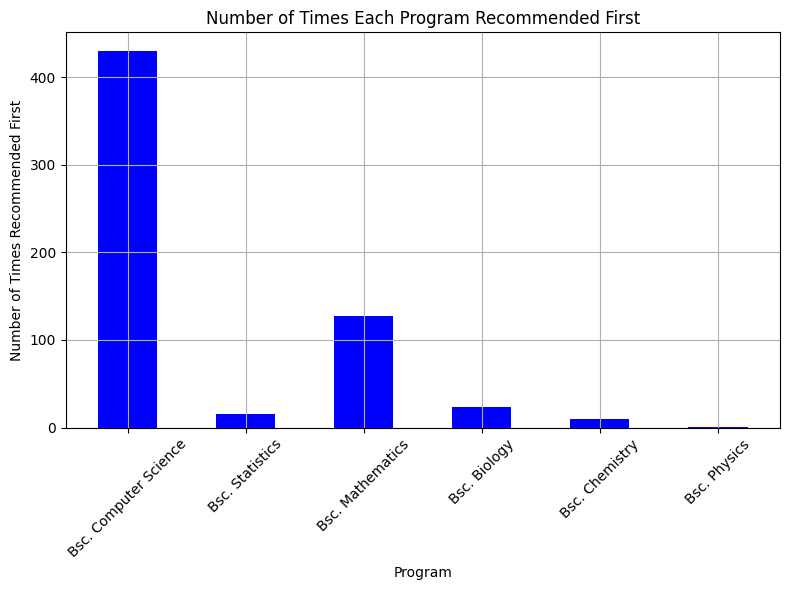

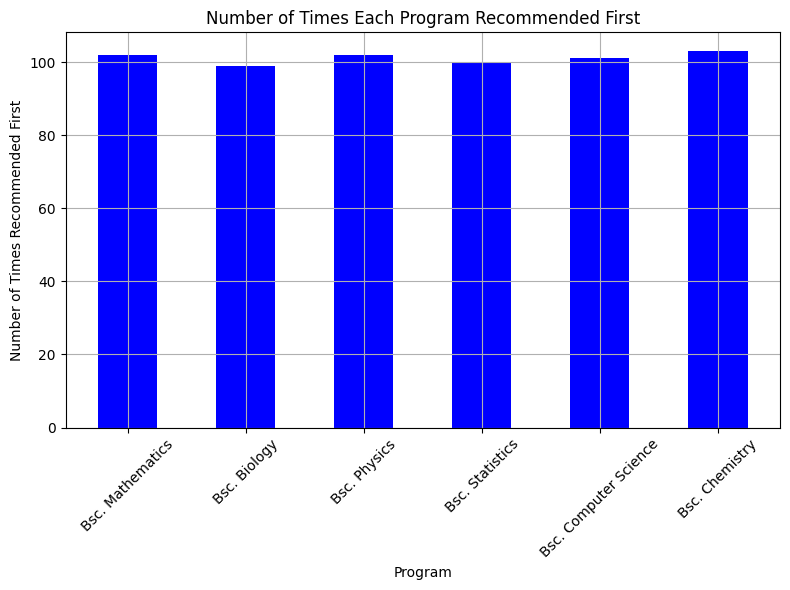

RMSE: 0.6981
Root Mean Squared Error (RMSE): 0.6981022846069511
MAE:  0.5657
Mean Absolute Error (MAE): 0.5657069055172003
Root Mean Squared Error (RMSE): 0.6250617752035823
Mean Absolute Error (MAE): 0.2247527841591936
RMSE: 0.6981
MAE:  0.5657


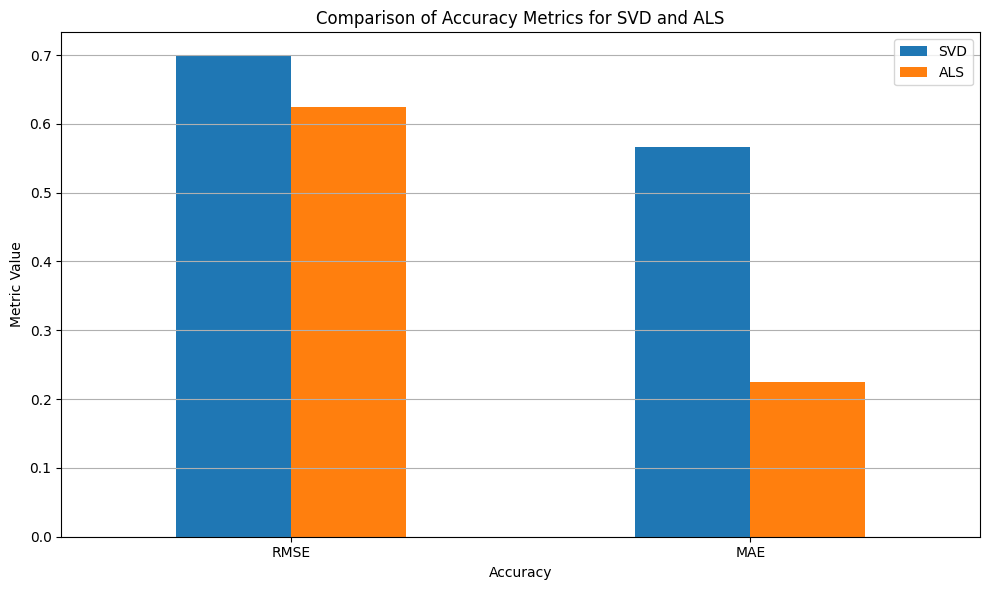

Elapsed time: 122.66145062446594 seconds


In [6]:
start_time = time.time()
class RecommenderSystem:
  def __init__(self, data_file_path):
    self.data_file_path = data_file_path
    self.df = None
    self.train_df = None
    self.test_df = None
    self.X_train = None
    self.y_train = None
    self.X_test = None
    self.y_test = None
    self.recommendation_data = None

  def mount_google_drive(self):
    drive.mount('/content/drive')

  def read_data(self):
    self.df = pd.read_csv(self.data_file_path)

  def preprocess_data(self):
    # Rename column 'Degree_Name' to 'Degree_ID'
    self.df.rename(columns={'Degree_Name': 'Degree_ID'}, inplace=True)

    # Drop the 'Timestamp' column
    del self.df['Timestamp']

    # Fill missing values with 'None'
    self.df.fillna('None', inplace=True)

    # Create a 'User_ID' column with a consistent format
    self.df.insert(0, 'User_ID', 'STUDENT' + (self.df.index + 1).astype(str))

    # Map income levels to categorical values
    def map_rating(income):
        if income == 'inc ≤ $1':
            return 'Insufficient'
        elif income == '$1 < inc ≤ $2':
            return 'Barely Enough'
        elif income == '$2 < inc ≤ $3':
            return 'Comfortable'
        elif income == '$4 < inc ≤ $5':
            return 'Generous'
        else:
            return 'Luxurious'

    self.df['Annual_Income'] = self.df['Annual_Income'].apply(lambda x: map_rating(x))

    # Label encoding for categorical features
    le = LabelEncoder()
    self.df['Financially Dependent'] = le.fit_transform(self.df['Financially Dependent'])
    self.df['S/F_Aid'] = le.fit_transform(self.df['S/F_Aid'])
    self.df['Gender'] = le.fit_transform(self.df['Gender'])
    self.df['High_School_Course'] = le.fit_transform(self.df['High_School_Course'])

    # Ordinal encoding for ordinal features
    income_mapping = {'Very Low': 0, 'Low': 1, 'Moderate': 2, 'High': 3, 'Very High': 4}
    self.df['Interest_Before_Enrollment'] = self.df['Interest_Before_Enrollment'].map(income_mapping)
    self.df['Interest_After_Enrollment'] = self.df['Interest_After_Enrollment'].map(income_mapping)

    # Map annual income categories to numerical values
    income_mapping = {'Insufficient': 0, 'Barely Enough': 1, 'Comfortable': 2, 'Generous': 3, 'Luxurious': 4}
    self.df['Annual_Income'] = self.df['Annual_Income'].map(income_mapping)

    # Compute Weighted Ratings
    weights = [0.7, 0.3]
    self.df['Weighted_Rating'] = (self.df['Interest_After_Enrollment'] * weights[0]) + (
            self.df['Interest_Before_Enrollment'] * weights[1])
    self.df.drop(columns=['Interest_After_Enrollment', 'Interest_Before_Enrollment'], inplace=True)

    # Create mapping dictionaries for User_ID and Degree_ID
    user_id_to_num = {user_id: num + 1 for num, user_id in enumerate(self.df['User_ID'].unique())}
    degree_id_to_num = {degree_id: num + 1 for num, degree_id in enumerate(self.df['Degree_ID'].unique())}

    # Convert User_ID and Degree_ID columns to numerical values
    self.df['User_Num'] = self.df['User_ID'].map(user_id_to_num)
    self.df['Degree_Num'] = self.df['Degree_ID'].map(degree_id_to_num)

    # Save the preprocessed data to a CSV file
    self.df.to_csv('/content/drive/MyDrive/trial.csv', index=False)
    pass


  def explore_and_visualize_data(self):
    # Population of Students In Programs by Gender
    degree_ids = self.df['Degree_ID'].unique()
    female_counts = self.df[self.df['Gender'] == 0]['Degree_ID'].value_counts().reindex(degree_ids, fill_value=0)
    male_counts = self.df[self.df['Gender'] == 1]['Degree_ID'].value_counts().reindex(degree_ids, fill_value=0)

    X = np.arange(len(degree_ids))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(X - width/2, male_counts, width, label='Male')
    rects2 = ax.bar(X + width/2, female_counts, width, label='Female')

    ax.set_ylabel('Number of Students')
    ax.set_xlabel('Program ID')
    ax.set_xticks(X)
    ax.set_xticklabels(degree_ids, rotation=45, ha='right')
    ax.grid()
    ax.legend()

    plt.tight_layout()
    plt.show()
    print(self.df[self.df['Gender'] == 0]['Degree_ID'].value_counts())
    print(self.df[self.df['Gender'] == 1]['Degree_ID'].value_counts())

    # Correlation Matrix
    correlation_matrix = self.df.drop(['User_Num', 'Degree_Num'], axis=1).corr()
    print(correlation_matrix)

    # Kernel Density Estimation on student grades for each gender
    plt.figure(figsize=(12, 6))

    # Define a color palette for the different 'Degree_ID' categories
    degree_colors = ['blue', 'green', 'orange', 'red', 'purple', 'yellow']
    degree_categories = self.df['Degree_ID'].unique()

    # Iterate over each 'Degree_ID' category
    for i, degree_id in enumerate(degree_categories):
        # Select data for the current 'Degree_ID' and both genders
        data_female = self.df[(self.df['Degree_ID'] == degree_id) & (self.df['Gender'] == 0)]['CWA']
        data_male = self.df[(self.df['Degree_ID'] == degree_id) & (self.df['Gender'] == 1)]['CWA']

        # Plot the normal distribution for each gender using a different color
        sns.kdeplot(data=data_female, color=degree_colors[i], label=f'Female: {degree_id}')
        sns.kdeplot(data=data_male, color=degree_colors[i], label=f'Male: {degree_id}', linestyle='dashed')

    plt.xlabel('CWA')
    plt.ylabel('Density')
    plt.legend(title='Gender & Program ID')

    plt.show()
    pass

  def split_data(self):
    # Splitting Data into training and testing sets
    self.train_df, self.test_df = train_test_split(self.df, test_size=0.3, random_state=101)
    self.X_train = self.train_df.drop(['User_ID', 'Degree_ID', 'Weighted_Rating', 'S/F_Aid_Program', 'Payment Level', 'User_Num', 'Degree_Num'], axis=1)
    self.y_train = self.train_df['Weighted_Rating']
    self.X_test = self.test_df.drop(['User_ID', 'Degree_ID', 'Weighted_Rating', 'S/F_Aid_Program', 'Payment Level', 'User_Num', 'Degree_Num'], axis=1)
    self.y_test = self.test_df['Weighted_Rating']
    pass

  def train_linear_models(self):
    # Training linear regression models

    # LINEAR REGRESSION
    self.MLR = LinearRegression()
    # Training the model
    self.MLR.fit(self.X_train, self.y_train)
    #Creating the coefficient table
    Intercept = self.MLR.intercept_
    cdf = pd.DataFrame(self.MLR.coef_,self.X_train.columns,columns=['Coefficient'])
    print(f'{cdf} \n\nIntercept = {Intercept}')

    # ELASTIC NET REGRESSION
    # Define the alpha and l1_ratio values to be searched
    self.alphas = [0.001, 0.01, 0.1, 10.0]
    self.l1_ratios = [0.001, 0.01, 0.1, 0.5, 0.9, 1.0]

    # Create the parameter grid
    param_grid = {'alpha': self.alphas, 'l1_ratio': self.l1_ratios}

    # Create the Elastic Net regression model
    self.ENR = ElasticNet()

    # Perform Grid Search with cross-validation
    grid_search = GridSearchCV(estimator=self.ENR, param_grid=param_grid, cv=15, scoring='r2')
    grid_search1 = GridSearchCV(estimator=self.ENR, param_grid=param_grid, cv=15, scoring='neg_mean_squared_error')
    grid_search.fit(self.X_train, self.y_train)
    grid_search1.fit(self.X_train, self.y_train)

    # Get the results from Grid Search
    results = grid_search.cv_results_
    results1 = grid_search1.cv_results_

    # Extract mean test scores and convert them into a 2D array
    self.mean_scores = np.array(results['mean_test_score']).reshape(len(self.alphas), len(self.l1_ratios))
    self.mean_scores1 = np.array(results1['mean_test_score']).reshape(len(self.alphas), len(self.l1_ratios))

    # Get the best hyperparameters
    best_alpha = grid_search.best_params_['alpha']
    best_l1_ratio = grid_search.best_params_['l1_ratio']

    # Initialize and train the ElasticNet model with the best hyperparameters
    self.ENR = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
    self.ENR.fit(self.X_train, self.y_train)
    pass

  def train_neural_network(self):
    # Training neural network

    # Standardize the variables
    scalar = StandardScaler()
    scalar.fit(self.X_train)
    self.X_train_scaled = scalar.transform(self.X_train)
    self.X_test_scaled = scalar.transform(self.X_test)

    # Define the model
    self.ANN = Sequential()

    # Define activation function, number of neurons in the input layer, hidden layers, and output layer
    self.ANN.add(Dense(128, input_dim=7, activation='relu'))
    self.ANN.add(Dense(256, activation='relu'))
    self.ANN.add(Dense(1, activation='linear'))

    # Compile the model, optimizing the loss function
    self.ANN.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

    # Define the learning rate scheduler callback
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

    # Set random seeds for reproducibility
    np.random.seed(101)
    tf.random.set_seed(101)

    # Train the model
    self.history = self.ANN.fit(self.X_train_scaled, self.y_train, epochs=300, batch_size=64, validation_split=0.2, callbacks=[lr_scheduler])
    pass

  def evaluate_models(self):
    # Evaluating the Predictive Models

    # Linear Regression using:
        # RMSE
    self.MLR_RMSE_test = np.sqrt(mean_squared_error(self.y_test, self.MLR.predict(self.X_test)))
    MLR_RMSE_train = np.sqrt(mean_squared_error(self.y_train, self.MLR.predict(self.X_train)))
        # MAE
    self.MLR_MAE_test = mean_absolute_error(self.y_test, self.MLR.predict(self.X_test))
    MLR_MAE_train = mean_absolute_error(self.y_train, self.MLR.predict(self.X_train))
        # R-Squared
    self.MLR_r2_test = explained_variance_score(self.y_test, self.MLR.predict(self.X_test))
    MLR_r2_train = explained_variance_score(self.y_train, self.MLR.predict(self.X_train))

    # Elastic Net Regression using:
        # RMSE
    self.ENR_RMSE_test = np.sqrt(mean_squared_error(self.y_test, self.ENR.predict(self.X_test)))
    ENR_RMSE_train = np.sqrt(mean_squared_error(self.y_train, self.ENR.predict(self.X_train)))
        # MAE
    self.ENR_MAE_test = mean_absolute_error(self.y_test, self.ENR.predict(self.X_test))
    ENR_MAE_train = mean_absolute_error(self.y_train, self.ENR.predict(self.X_train))
        # R-Squared
    self.ENR_r2_test = explained_variance_score(self.y_test, self.ENR.predict(self.X_test))
    ENR_r2_train = explained_variance_score(self.y_train, self.ENR.predict(self.X_train))

    # Artificial Neural Network using:
        # RMSE
    self.ANN_RMSE_test = np.sqrt(mean_squared_error(self.y_test, self.ANN.predict(self.X_test_scaled)))
    ANN_RMSE_train = np.sqrt(mean_squared_error(self.y_train, self.ANN.predict(self.X_train_scaled)))
        # MAE
    self.ANN_MAE_test = mean_absolute_error(self.y_test, self.ANN.predict(self.X_test_scaled))
    ANN_MAE_train = mean_absolute_error(self.y_train, self.ANN.predict(self.X_train_scaled))
        # R-Squared
    self.ANN_r2_test = explained_variance_score(self.y_test, self.ANN.predict(self.X_test_scaled))
    ANN_r2_train = explained_variance_score(self.y_train, self.ANN.predict(self.X_train_scaled))

    print(f'\n\t\t\t\t\t\t\t EVALUATION \n\t\t\t\t TEST SETS \t\t\t\t\t\t TRAIN SETS\n MLR_RMSE : \t {self.MLR_RMSE_test} \t\t\t\t {MLR_RMSE_train}\n ENR_RMSE : \t {self.ENR_RMSE_test} \t\t\t\t {ENR_RMSE_train}\n ANN_RMSE : \t {self.ANN_RMSE_test} \t\t\t\t {ANN_RMSE_train}\n\n MLR_MAE : \t {self.MLR_MAE_test} \t\t\t\t {MLR_MAE_train}\n ENR_MAE : \t {self.ENR_MAE_test} \t\t\t\t {ENR_MAE_train}\n ANN_MAE : \t {self.ANN_MAE_test} \t\t\t\t {ANN_MAE_train}\n\n MLR_r2 : \t {self.MLR_r2_test} \t\t\t {MLR_r2_train}\n ENR_r2 : \t {self.ENR_r2_test} \t\t\t\t {ENR_r2_train}\n ANN_r2 : \t {self.ANN_r2_test} \t\t\t {ANN_r2_train}\n')
    pass

  def results(self):
    # # Create a DataFrame with the actual and predicted test values
    print("MULTIPLE LINEAR REGRESSION")
    data_test = pd.DataFrame({'Actual': self.y_test, 'Predicted': self.MLR.predict(self.X_test)})
    print(data_test.head(10))
    # Create a DataFrame with the actual and predicted train values
    data_train = pd.DataFrame({'Actual': self.y_train, 'Predicted': self.MLR.predict(self.X_train)})
    print(data_train.head(10))
    print("\n\n")

    print("ELASTIC NET REGRESSION")
    # Create a DataFrame with the actual and predicted test values
    data_test1 = pd.DataFrame({'Actual': self.y_test, 'Predicted': self.ENR.predict(self.X_test)})
    print(data_test1.head(10))
    # Create a DataFrame with the actual and predicted train values
    data_train1 = pd.DataFrame({'Actual': self.y_train, 'Predicted': self.ENR.predict(self.X_train)})
    print(data_train1.head(10))
    print("\n\n")

    print("ARTIFICIAL NEURAL NETWORK")
    # Create a DataFrame with the actual and predicted test values
    data_test2 = pd.DataFrame({'Actual': self.y_test, 'Predicted': self.ANN.predict(self.X_test_scaled).flatten().tolist()})
    print(data_test2.head(10))
    # print(data_test2.tail(15))

    # # Create a DataFrame with the actual and predicted train values
    data_train2 = pd.DataFrame({'Actual': self.y_train, 'Predicted': self.ANN.predict(self.X_train_scaled).flatten().tolist()})
    print(data_train2.head(10))

  def visualize_model_prediction(self):
    # Evaluation Visualization

    # L1-Ratio and Alpha in ENR using R-Squared
    plt.figure(figsize=(8, 6))
    for i, alpha in enumerate(self.alphas):
        plt.plot(self.l1_ratios, self.mean_scores[i], label=f'alpha={alpha}')
    plt.xlabel('l1_ratio')
    plt.ylabel('Accuracy Score (R-squared)')
    plt.title('Accuracy Scores for Elastic Net')
    plt.legend()
    plt.grid()
    plt.show()

    # L1-Ratio and Alpha in ENR using MSE
    plt.figure(figsize=(8, 6))
    for i, alpha in enumerate(self.alphas):
        plt.plot(self.l1_ratios, self.mean_scores1[i], label=f'alpha={alpha}')
    plt.xlabel('l1_ratio')
    plt.ylabel('Accuracy Score (MSE)')
    plt.title('Accuracy Scores for Elastic Net')
    plt.legend()
    plt.grid()
    plt.show()

    # Validation set and Actual Set Aganist Loss
    loss=self.history.history['loss']
    val_loss=self.history.history['val_loss']
    epochs = range(1, len(loss)+1)

    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

    # Validation set and Actual Set Aganist Accuracy(MAE)
    acc = self.history.history['mae']
    val_acc = self.history.history['val_mae']
    plt.plot(epochs, acc,'y', label='Training MAE')
    plt.plot(epochs, val_acc, 'r', label='Validation MAE')
    plt.title('Training and Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


    # Creating a DataFrame to store the metrics
    data = {
        'Accuracy': ['RMSE','MAE','R-squared'],
        'Multiple Linear Regression': [self.MLR_RMSE_test, self.MLR_MAE_test, self.MLR_r2_test],
        'Elastic_Net Regerssion': [self.ENR_RMSE_test, self.ENR_MAE_test, self.ENR_r2_test],
        'Artificial Neural Network': [self.ANN_RMSE_test, self.ANN_MAE_test, self.ANN_r2_test]
    }
    metrics_df = pd.DataFrame(data)
    fig, ax = plt.subplots(figsize=(10, 6))
    metrics_df.plot(x='Accuracy', kind='bar', ax=ax)
    ax.set_ylabel('Metric Value')
    ax.set_title('Comparison of Accuracy Metrics for Linear Regression and Elastic Net')
    ax.set_xticklabels(metrics_df['Accuracy'], rotation=0)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
    pass

  def data_recommendation(self):
    # Converting Predictions From ANN to List
    Xnn = self.ANN.predict(self.X_test_scaled)
    Xnn = Xnn.flatten().tolist()

    xnn = self.ANN.predict(self.X_train_scaled)
    xnn = xnn.flatten().tolist()

    # Creating a new column in train and test dataframes
    self.train_df['Predicted_Rating'] = xnn
    self.test_df['Predicted_Rating'] = Xnn

    # Concatenating both training and testing predictions from ANN
    concatenated_indices = pd.concat([self.train_df, self.test_df])

    # Extracting User_ID and their respective Degree_ID and Predicted Ratings
    student_id = concatenated_indices['User_ID']
    degree_id = concatenated_indices['Degree_ID']
    rat = concatenated_indices['Predicted_Rating']

    # Dataframe for Recommendation
    self.recommendation_data = pd.DataFrame({'Student_ID': student_id, 'Degree_ID': degree_id, 'RAT': rat})
    pass

  def recommend_programs_svd(self):
    # Generating seed
    random.seed(101)
    np.random.seed(101)

    # Loading recommendation data
    reader = Reader(rating_scale=(0, 5))
    data = Dataset.load_from_df(self.recommendation_data[['Student_ID', 'Degree_ID', 'RAT']], reader)

    # Spliting the data into train and test sets
    from surprise.model_selection import train_test_split
    trainset, testset = train_test_split(data, test_size=0.3, random_state=101)

    # Create the SVD model and fit it on the trainset
    svd = SVD()
    svd.fit(trainset)

    # Use the model to make predictions on the testset
    predictions = svd.test(testset)
    self.SVD_predictons = predictions

                  # MAKING RECOMMENDATIONS FOR ALL STUDENTS IN THE DATA
    # Make predictions for all student and degree
    all_predictions = []
    for user_id in self.recommendation_data['Student_ID'].unique():
        for degree_id in self.recommendation_data['Degree_ID'].unique():
            predicted_rating = svd.predict(user_id, degree_id).est
            all_predictions.append((user_id, degree_id, predicted_rating))

    # Convert predictions to a DataFrame
    all_predictions_df = pd.DataFrame(all_predictions, columns=['Student_ID', 'Degree_ID', 'Predicted_Rating'])

    # Sort predictions for each student based on predicted rating
    sorted_predictions = all_predictions_df.sort_values(['Student_ID', 'Predicted_Rating'], ascending=[True, False])

    # Get top N recommendations for each user
    num_recommendations = 6
    self.user_recommendations = {}
    for user_id in sorted_predictions['Student_ID'].unique():
        user_predictions = sorted_predictions[sorted_predictions['Student_ID'] == user_id]
        top_n_recommendations = user_predictions.head(num_recommendations)['Degree_ID'].tolist()
        self.user_recommendations[user_id] = top_n_recommendations

    print("Recommended degrees (SVD) for all users:")
    for user_id in sorted_predictions['Student_ID'].unique():
        user_predictions = sorted_predictions[sorted_predictions['Student_ID'] == user_id]
        top_n_recommendations = user_predictions.head(num_recommendations)['Degree_ID'].tolist()
        print(f"{user_id}:")
        for degree in top_n_recommendations:
            print(f"\t\t\t{degree}")
    pass

  def recommend_programs_als(self):
    # BUILDING ALS MODEL
    # Create a sparse matrix from the recommendation data
    sparse_data = self.recommendation_data.pivot(index='Student_ID', columns='Degree_ID', values='RAT')
    sparse_data = sparse_data.fillna(0)
    self.sparse_matrix = sparse_data.values
    # Convert the NumPy array to CSR sparse matrix
    self.sparse_matrix = sparse.csr_matrix(self.sparse_matrix)

    # Initialize an ALS model
    model = implicit.als.AlternatingLeastSquares(
        factors=6,
        iterations=1000,
        regularization=0.1,
        random_state=101  # Random seed for reproducibility
    )

    # Fit the model to the sparse matrix
    model.fit(self.sparse_matrix)

    # Generate student and degree factors
    user_factors = model.user_factors
    item_factors = model.item_factors

    # Calculate predicted ratings
    self.predicted_ratings = np.dot(user_factors, item_factors.T)

    # Get the user factors and item factors
    user_factors = model.user_factors
    item_factors = model.item_factors



    # MAKING RECOMMENDATIONS FOR ALL STUDENTS IN THE DATA
    # Calculate the predicted ratings for all users and items
    all_predicted_ratings = user_factors.dot(item_factors.T)

    # Create a DataFrame to store the recommendations
    all_recommendations = pd.DataFrame(index=range(len(all_predicted_ratings)), columns=sparse_data.columns)

    # Fill in the DataFrame with the predicted ratings
    all_recommendations.loc[:, :] = all_predicted_ratings

    # Get the top N recommendations for each user
    num_recommendations = 6  # Adjust the number of recommendations as needed
    self.user_recommendation = {}

    for user_id, row in all_recommendations.iterrows():
        top_n_recommendations = row.sort_values(ascending=False).index[:num_recommendations]
        self.user_recommendation[user_id] = top_n_recommendations.tolist()

    # Print the recommendations for all users
    for user_id, recommendations in self.user_recommendation.items():
        print(f"User {user_id}:")
        for rank, degree_id in enumerate(recommendations, start=1):
            print(f"  Rank {rank}: Degree {degree_id}")
    pass

  def visualize_recommendations(self):
                          # VISUALIZATION(SVD RECOMMENDATIONS)
    # Count the number of times each program is recommended as the first recommendation
    first_recommendations = [recommendations[0] for recommendations in self.user_recommendations.values()]
    program_counts = Counter(first_recommendations)

    # Create a bar graph
    programs = list(program_counts.keys())
    counts = list(program_counts.values())

    plt.figure(figsize=(8, 6))
    bar_width = 0.5  # Adjust this value to control the width of the bars
    plt.bar(programs, counts, color='blue', width=bar_width)
    plt.xlabel('Program')
    plt.ylabel('Number of Times Recommended First')
    plt.title('Number of Times Each Program Recommended First')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid()
    # Show the graph
    plt.show()


                          # VISUALIZATION(ALS RECOMMENDATIONS)
    # Count the number of times each program is recommended as the first recommendation
    first_recommendations = [recommendations[0] for recommendations in self.user_recommendation.values()]
    program_counts = Counter(first_recommendations)

    # Create a bar graph
    programs = list(program_counts.keys())
    counts = list(program_counts.values())

    plt.figure(figsize=(8, 6))
    bar_width = 0.5  # Adjust this value to control the width of the bars
    plt.bar(programs, counts, color='blue', width=bar_width)
    plt.xlabel('Program')
    plt.ylabel('Number of Times Recommended First')
    plt.title('Number of Times Each Program Recommended First')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid()
    # Show the graph
    plt.show()
    pass

  def evaluate_recommendations(self):
      # EVALUATING MODELS

      # RMSE and MAE on SVD model
      print(f"Root Mean Squared Error (RMSE): {accuracy.rmse(self.SVD_predictons)}")
      print(f"Mean Absolute Error (MAE): {accuracy.mae(self.SVD_predictons)}")

      # RMSE and MAE on ALS model
      actual_ratings = self.sparse_matrix.toarray()
      predicted_test_ratings = self.predicted_ratings
      self.ALS_rmse = np.sqrt(np.mean((actual_ratings - predicted_test_ratings) ** 2))
      self.ALS_mae = np.mean(np.abs(np.array(actual_ratings) - np.array(predicted_test_ratings)))

      print("Root Mean Squared Error (RMSE):", self.ALS_rmse)
      print("Mean Absolute Error (MAE):", self.ALS_mae)
      pass

  def visualize_model_comparison(self):
    # VISUALIZATION(SVD vs. ALS EVALUATION)
    # Create a DataFrame to store the metrics
    data = {
        'Accuracy': ['RMSE','MAE'],
        'SVD': [accuracy.rmse(self.SVD_predictons), accuracy.mae(self.SVD_predictons)],
        'ALS': [self.ALS_rmse, self.ALS_mae]
    }
    metrics_df = pd.DataFrame(data)
    fig, ax = plt.subplots(figsize=(10, 6))
    metrics_df.plot(x='Accuracy', kind='bar', ax=ax)
    ax.set_ylabel('Metric Value')
    ax.set_title('Comparison of Accuracy Metrics for SVD and ALS')
    ax.set_xticklabels(metrics_df['Accuracy'], rotation=0)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
    pass

  def run(self):
    self.mount_google_drive()
    self.read_data()
    self.preprocess_data()
    self.explore_and_visualize_data()
    self.split_data()
    self.train_linear_models()
    self.train_neural_network()
    self.evaluate_models()
    self.results()
    self.visualize_model_prediction()
    self.data_recommendation()
    self.recommend_programs_svd()
    self.recommend_programs_als()
    self.visualize_recommendations()
    self.evaluate_recommendations()
    self.visualize_model_comparison()

# Usage
if __name__ == "__main__":
  data_file_path = '/content/drive/MyDrive/Building An Undergraduate Program Recommender System.csv'
  recommender = RecommenderSystem(data_file_path)
  recommender.run()

end_time = time.time()
# Calculate and print the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")